In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from quantfin.random_walk import geometric_brownian

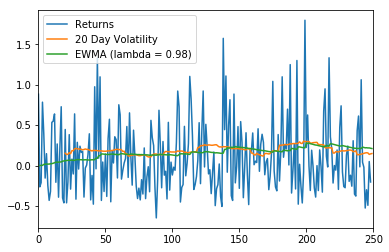

In [101]:
t = np.arange(0, 250) # Time
A = geometric_brownian(250, 0.01, 0.0, 0.4) # Closing prices

R = np.array([(A[n] - A[n-1]) / A[n-1] for n in range(1, 250)]) # Returns
returns, = plt.plot(R);
plt.xlim((0, 250));

M = 20
sigma = np.zeros(250 - M) # M-day moving average
for i in range(M, 250):
    sigma[i-M] = R[i-M:i+M].std() ** 2
    
volatilty, = plt.plot(t[M:], sigma);

smoothing = 0.98
sigma2 = np.zeros(249) # Exponentially weighted moving average
for n in range(249):
    accum = np.array([(smoothing ** i) * (R[n-i] ** 2) for i in range(n)]).sum()
    sigma2[n] = accum * (1 - smoothing)

ewma, = plt.plot(t[1:], sigma2);

plt.legend([returns, volatilty, ewma],
           ["Returns",
            "20 Day Volatility",
            "EWMA (lambda = {})".format(smoothing)]);